In [1]:
import pandas as pd
import numpy as np
import requests
import cfbd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#home_id, away_id

In [3]:
from __future__ import print_function
import time
import cfbd
from cfbd.rest import ApiException
from pprint import pprint

# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'RRRpRRQDqVoLX6S9Oivl7G9fXmZ/4TDcL9q+xg6pBW+yWfU1PIrYm/cbwKVuIfwn'
configuration.api_key_prefix['Authorization'] = 'Bearer'

# create an instance of the API class
api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))
try:
    # Games
    games = api_instance.get_games(year=2021)
    #pprint(games)
except ApiException as e:
    print("Exception when calling BettingApi->get_lines: %s\n" % e)

In [4]:
df = pd.DataFrame.from_records([dict(game_id=g.id,home_team=g.home_team, home_team_id=g.home_id, home_points=g.home_points, home_points_q=g.home_line_scores,away_points_q=g.away_line_scores,away_team_id=g.away_id, away_team=g.away_team, away_points=g.away_points,date=g.start_date,venue_id=g.venue_id,venue=g.venue,neutral_site=g.neutral_site) for g in games])
df.head()

,game_id,home_team,home_team_id,home_points,home_points_q,away_points_q,away_team_id,away_team,away_points,date,venue_id,venue,neutral_site
0,401282714,Illinois,356,30,"[2, 14, 14, 0]","[0, 9, 7, 6]",158,Nebraska,22,2021-08-28T17:20:00.000Z,3832.0,Memorial Stadium,False
1,401286187,Fresno State,278,45,"[7, 24, 7, 7]","[0, 0, 0, 0]",41,Connecticut,0,2021-08-28T18:00:00.000Z,3660.0,Bulldog Stadium,False
2,401329133,Central State,2119,6,"[0, 0, 0, 6]","[6, 7, 0, 7]",2310,Kentucky State,20,2021-08-28T19:00:00.000Z,3861.0,Ohio Stadium,True
3,401309833,UCLA,26,44,"[24, 7, 13, 0]","[3, 0, 7, 0]",62,Hawai'i,10,2021-08-28T19:30:00.000Z,1056.0,Rose Bowl,False
4,401328337,Indiana State,282,26,"[7, 3, 7, 9]","[0, 7, 7, 7]",2197,Eastern Illinois,21,2021-08-28T22:00:00.000Z,3829.0,Memorial Stadium,False


In [5]:
home_df = df[['game_id','home_team_id','home_team','home_points','home_points_q','date','venue_id','venue','neutral_site','away_team','away_points','away_points_q','away_team_id']]
home_df.rename(columns={'away_team':'opponent','away_points':'points_allowed','away_points_q':'opponent_points_q','away_team_id':'opponent_id'},inplace=True)

In [6]:
home_points_split = home_df[['game_id','home_points_q']].copy()


In [7]:
split_df_home = pd.DataFrame(home_points_split['home_points_q'].to_list())

In [8]:
split_df_home.rename(columns={0:'home_points_q1',1:'home_points_q2',2:'home_points_q3',3:'home_points_q4'},inplace=True)
split_df_home = split_df_home[['home_points_q1','home_points_q2','home_points_q3','home_points_q4']].copy()

In [9]:
opponent_points_split = home_df[['game_id','opponent_points_q']].copy()

In [10]:
split_df_opponent = pd.DataFrame(opponent_points_split['opponent_points_q'].to_list())

In [11]:
split_df_opponent.rename(columns={0:'points_allowed_q1',1:'points_allowed_q2',2:'points_allowed_q3',3:'points_allowed_q4'},inplace=True)
split_df_opponent = split_df_opponent[['points_allowed_q1','points_allowed_q2','points_allowed_q3','points_allowed_q4']].copy()

In [12]:
split_df_home.head()

,home_points_q1,home_points_q2,home_points_q3,home_points_q4
0,2.0,14.0,14.0,0.0
1,7.0,24.0,7.0,7.0
2,0.0,0.0,0.0,6.0
3,24.0,7.0,13.0,0.0
4,7.0,3.0,7.0,9.0


In [13]:
split_df_opponent.head()

,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4
0,0.0,9.0,7.0,6.0
1,0.0,0.0,0.0,0.0
2,6.0,7.0,0.0,7.0
3,3.0,0.0,7.0,0.0
4,0.0,7.0,7.0,7.0


In [14]:
home_info = pd.concat([home_df,split_df_home,split_df_opponent],axis=1)
home_info['is_home'] = 1
home_info.rename(columns={'home_team_id':'team_id','home_points':'points','home_points_q1':'points_q1','home_points_q2':'points_q2','home_points_q3':'points_q3','home_points_q4':'points_q4','home_team':'school'},inplace=True)
home_info.drop(columns=['home_points_q','opponent_points_q'],axis=1,inplace=True)
home_info.head()

,game_id,team_id,school,points,date,venue_id,venue,neutral_site,opponent,points_allowed,opponent_id,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home
0,401282714,356,Illinois,30,2021-08-28T17:20:00.000Z,3832.0,Memorial Stadium,False,Nebraska,22,158,2.0,14.0,14.0,0.0,0.0,9.0,7.0,6.0,1
1,401286187,278,Fresno State,45,2021-08-28T18:00:00.000Z,3660.0,Bulldog Stadium,False,Connecticut,0,41,7.0,24.0,7.0,7.0,0.0,0.0,0.0,0.0,1
2,401329133,2119,Central State,6,2021-08-28T19:00:00.000Z,3861.0,Ohio Stadium,True,Kentucky State,20,2310,0.0,0.0,0.0,6.0,6.0,7.0,0.0,7.0,1
3,401309833,26,UCLA,44,2021-08-28T19:30:00.000Z,1056.0,Rose Bowl,False,Hawai'i,10,62,24.0,7.0,13.0,0.0,3.0,0.0,7.0,0.0,1
4,401328337,282,Indiana State,26,2021-08-28T22:00:00.000Z,3829.0,Memorial Stadium,False,Eastern Illinois,21,2197,7.0,3.0,7.0,9.0,0.0,7.0,7.0,7.0,1


In [15]:
################################################################

In [16]:
away_df = df[['game_id','away_team_id','away_team','away_points','away_points_q','date','venue_id','venue','neutral_site','home_team','home_points','home_team_id']]

In [17]:
away_points_split = away_df[['game_id','away_points_q']].copy()

In [18]:
split_df_away = pd.DataFrame(away_points_split['away_points_q'].to_list())

In [19]:
split_df_away.rename(columns={0:'away_points_q1',1:'away_points_q2',2:'away_points_q3',3:'away_points_q4'},inplace=True)
split_df_away = split_df_away[['away_points_q1','away_points_q2','away_points_q3','away_points_q4']].copy()

In [20]:
home_opponent_scores = split_df_home.copy()
home_opponent_scores.rename(columns={'home_points_q1':'points_allowed_q1','home_points_q2':'points_allowed_q2','home_points_q3':'points_allowed_q3','home_points_q4':'points_allowed_q4'},inplace=True)

In [21]:
away_info = pd.concat([away_df,split_df_away,home_opponent_scores],axis=1)
away_info['is_home'] = 0
away_info.rename(columns={'away_team_id':'team_id','away_points':'points','away_points_q1':'points_q1','away_points_q2':'points_q2','away_points_q3':'points_q3','away_points_q4':'points_q4','away_team':'school','home_points':'points_allowed','home_team':'opponent','home_team_id':'opponent_id'},inplace=True)
away_info.drop(columns=['away_points_q'],axis=1,inplace=True)
away_info.head()

,game_id,team_id,school,points,date,venue_id,venue,neutral_site,opponent,points_allowed,opponent_id,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home
0,401282714,158,Nebraska,22,2021-08-28T17:20:00.000Z,3832.0,Memorial Stadium,False,Illinois,30,356,0.0,9.0,7.0,6.0,2.0,14.0,14.0,0.0,0
1,401286187,41,Connecticut,0,2021-08-28T18:00:00.000Z,3660.0,Bulldog Stadium,False,Fresno State,45,278,0.0,0.0,0.0,0.0,7.0,24.0,7.0,7.0,0
2,401329133,2310,Kentucky State,20,2021-08-28T19:00:00.000Z,3861.0,Ohio Stadium,True,Central State,6,2119,6.0,7.0,0.0,7.0,0.0,0.0,0.0,6.0,0
3,401309833,62,Hawai'i,10,2021-08-28T19:30:00.000Z,1056.0,Rose Bowl,False,UCLA,44,26,3.0,0.0,7.0,0.0,24.0,7.0,13.0,0.0,0
4,401328337,2197,Eastern Illinois,21,2021-08-28T22:00:00.000Z,3829.0,Memorial Stadium,False,Indiana State,26,282,0.0,7.0,7.0,7.0,7.0,3.0,7.0,9.0,0


In [28]:
away_info.shape

(2408, 20)

In [29]:
home_info.shape

(2408, 20)

In [30]:
game_scoring = pd.concat([home_info,away_info],axis=0)

In [31]:
game_scoring.shape

(4816, 20)

In [32]:
game_scoring[game_scoring['school']=='Alabama']

,game_id,team_id,school,points,date,venue_id,venue,neutral_site,opponent,points_allowed,opponent_id,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home
299,401282056,333,Alabama,48,2021-09-11T20:00:00.000Z,3657.0,Bryant Denny Stadium,False,Mercer,14,2382,14.0,17.0,14.0,3.0,0.0,0.0,7.0,7.0,1
781,401282081,333,Alabama,63,2021-09-25T23:30:00.000Z,3657.0,Bryant Denny Stadium,False,Southern Mississippi,14,2572,21.0,21.0,7.0,14.0,0.0,7.0,0.0,7.0,1
918,401282089,333,Alabama,42,2021-10-02T19:30:00.000Z,3657.0,Bryant Denny Stadium,False,Ole Miss,21,145,7.0,21.0,7.0,7.0,0.0,0.0,7.0,14.0,1
1544,401282111,333,Alabama,52,2021-10-23T23:00:00.000Z,3657.0,Bryant Denny Stadium,False,Tennessee,24,2633,7.0,14.0,3.0,28.0,14.0,0.0,3.0,7.0,1
1940,401282120,333,Alabama,20,2021-11-06T23:00:00.000Z,3657.0,Bryant Denny Stadium,False,LSU,14,99,0.0,14.0,6.0,0.0,7.0,0.0,7.0,0.0,1
1996,401282127,333,Alabama,59,2021-11-13T17:00:00.000Z,3657.0,Bryant Denny Stadium,False,New Mexico State,3,166,14.0,35.0,0.0,10.0,3.0,0.0,0.0,0.0,1
2254,401282135,333,Alabama,42,2021-11-20T20:30:00.000Z,3657.0,Bryant Denny Stadium,False,Arkansas,35,8,3.0,21.0,10.0,8.0,0.0,14.0,7.0,14.0,1
2396,401282154,333,Alabama,41,2021-12-04T21:00:00.000Z,5348.0,Mercedes-Benz Stadium,True,Georgia,24,61,0.0,24.0,7.0,10.0,3.0,14.0,0.0,7.0,1
128,401281942,333,Alabama,44,2021-09-04T19:30:00.000Z,5348.0,Mercedes-Benz Stadium,True,Miami,13,2390,10.0,17.0,14.0,3.0,0.0,3.0,10.0,0.0,0
495,401282071,333,Alabama,31,2021-09-18T19:30:00.000Z,3634.0,Ben Hill Griffin Stadium,False,Florida,29,57,21.0,0.0,7.0,3.0,3.0,6.0,14.0,6.0,0


In [27]:
game_scoring.corr(method='pearson')

,game_id,team_id,points,venue_id,neutral_site,points_allowed,opponent_id,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home
game_id,1.000000,0.126265,-0.020942,2.933054e-01,-8.034193e-02,-0.020942,0.126265,-0.006582,-0.012555,-0.008259,-0.027469,-0.006582,-0.012555,-0.008259,-0.027469,0.000000e+00
team_id,0.126265,1.000000,-0.061874,1.743879e-01,-1.944818e-02,0.075201,0.107923,-0.032778,-0.056146,-0.023442,-0.048061,0.057318,0.061266,0.057874,0.000181,-3.144621e-02
points,-0.020942,-0.061874,1.000000,5.458792e-03,-1.739814e-02,-0.316007,0.075201,0.613652,0.679237,0.606276,0.489278,-0.233880,-0.264096,-0.197181,-0.062917,1.493653e-01
venue_id,0.293305,0.174388,0.005459,1.000000e+00,-2.615407e-03,0.005459,0.174388,0.017704,-0.011808,0.021981,-0.022071,0.017704,-0.011808,0.021981,-0.022071,6.363440e-19
neutral_site,-0.080342,-0.019448,-0.017398,-2.615407e-03,1.000000e+00,-0.017398,-0.019448,-0.023546,-0.021371,-0.008442,0.015131,-0.023546,-0.021371,-0.008442,0.015131,2.160899e-19
points_allowed,-0.020942,0.075201,-0.316007,5.458792e-03,-1.739814e-02,1.000000,-0.061874,-0.233880,-0.264096,-0.197181,-0.062917,0.613652,0.679237,0.606276,0.489278,-1.493653e-01
opponent_id,0.126265,0.107923,0.075201,1.743879e-01,-1.944818e-02,-0.061874,1.000000,0.057318,0.061266,0.057874,0.000181,-0.032778,-0.056146,-0.023442,-0.048061,3.144621e-02
points_q1,-0.006582,-0.032778,0.613652,1.770442e-02,-2.354590e-02,-0.233880,0.057318,1.000000,0.222808,0.187589,0.082047,-0.208144,-0.163080,-0.119607,-0.059881,1.466041e-01
points_q2,-0.012555,-0.056146,0.679237,-1.180823e-02,-2.137081e-02,-0.264096,0.061266,0.222808,1.000000,0.224087,0.086853,-0.163080,-0.250533,-0.146866,-0.052124,9.590654e-02
points_q3,-0.008259,-0.023442,0.606276,2.198102e-02,-8.441509e-03,-0.197181,0.057874,0.187589,0.224087,1.000000,0.077980,-0.119607,-0.146866,-0.161724,-0.034252,8.274785e-02


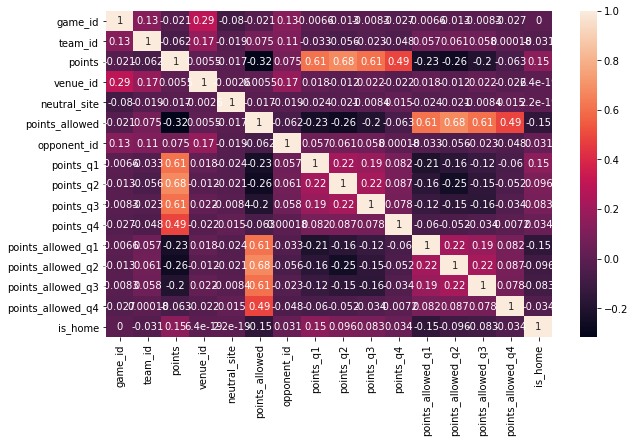

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(game_scoring.corr(),annot=True)